In [1]:
# 분류모델 종류 - Logistic Regression,SGD,KNN,SVM,Decision Tree, Random Forest, LGBMClassifier
# 최적화 - lgbm ,smote(imbalanced), outlier제거, scaler,randomsearch
# 평가지표 - classification_report, f1_score, roc_auc_score(predic_proba)

# 모델을 만들 data 를 merge. 
# 라벨값을 바이너리로 만들어줌 
# 트레인 테스트 데이터셋을 분리 
# 모델을 만들 반복문 돌리기
# 최적화하고 모델 다시 만들어서 차이를 비교 
# 피쳐임포턴스를 확인한 후에 피쳐를 뽑아내서 다시 반복 

In [2]:
##### 여러개 데이터프레임 merge 하기

# from functools import reduce
# import pandas as pd
# dfs = [df_coldwave, df_kr, df_near]
# cold_kr_near = reduce(lambda left, right: pd.merge(left,right,left_index=True, right_index=True), dfs)

In [3]:
##### Feature importance 시각화 하기 

# model =[rfc, dtc, lgbm]
# for i in model:
#     # 배열형태로 반환
#     ft_importance_values = i.feature_importances_

# # 정렬과 시각화를 쉽게 하기 위해 series 전환
#     ft_series = pd.Series(ft_importance_values, index = x_train.columns)
#     ft_top20 = ft_series.sort_values(ascending=False)[:20]

# # 시각화
#     plt.figure(figsize=(8,6))
#     plt.title('{} Feature Importance Top 20'.format(i))
#     sns.barplot(x=ft_top20, y=ft_top20.index)
#     plt.show()
#     print('-'*50)

In [4]:
##### 랜덤포레스트 모델의 하이퍼파라미터를 랜덤서치로 최적의 값 찾기 .

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# est = RandomForestClassifier(n_jobs=-1, n_estimators=500)
# rf_p_dist = {'max_depth':[3,5,10,None],
#                 'n_estimators':[100,200,300,400,500],
#                 'max_features':randint(1,3),
#                 'criterion':['gini','entropy'],
#                 'bootstrap':['True','False'],
#                 'min_samples_leaf':randint(1,4)}

# def hypertuning_rscv(est,p_distr, nbr_iter,x,y):
#     rdmserch = RandomizedSearchCV(est,param_distributions=p_distr,
#                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    
#     rdmserch.fit(x,y)
#     ht_params = rdmserch.best_params_
#     ht_score = rdmserch.best_score_
#     return ht_params, ht_score

# rf_parameters,rf_ht_score = hypertuning_rscv(est,rf_p_dist,40,x,y)

# y_pred = rfc.predict(x_test)

# # classifier=RandomForestClassifier

# # 교차검증하기 

# from sklearn.model_selection import cross_val_score
# cross_val = cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean()

In [5]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from functools import reduce
import warnings 
warnings.filterwarnings('ignore')

# 분류모델 import 
# Logistic Regression,SGD,KNN,SVM,Decision Tree, Random Forest, LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,roc_auc_score,f1_score

lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lgbm = LGBMClassifier()

In [6]:
# train, validation, test 데이터 분리하기 

# 데이터 불러오기
열대야 = pd.read_csv('./data/ML_preprocessed/열대야.csv',encoding='cp949',index_col=0)
고층기후 = pd.read_csv('./data/ML_preprocessed/고층기후.csv',encoding='cp949',index_col=0)
주변국기후 = pd.read_csv('./data/ML_preprocessed/주변국기후.csv',encoding='cp949',index_col=0)
폭염 = pd.read_csv('./data/ML_preprocessed/폭염.csv',encoding='cp949',index_col=0)
한국기후 = pd.read_csv('./data/ML_preprocessed/한국기후.csv',encoding='cp949',index_col=0)
한파 = pd.read_csv('./data/ML_preprocessed/한파.csv',encoding='cp949',index_col=0)
해상기후 = pd.read_csv('./data/ML_preprocessed/해상기후.csv',encoding='cp949',index_col=0)

# 데이터를 나누기 위해 인덱스를 일시로 해줌 
열대야.set_index('일시',inplace=True)
주변국기후.set_index('일시',inplace=True)
폭염.set_index('일시',inplace=True)
한국기후.set_index('일시',inplace=True)
한파.set_index('일시',inplace=True)
해상기후.set_index('일시',inplace=True)

# test 할 데이터 
열대야2019 = 열대야.loc['2019-01-01':'2019-12-31']
한파2019 = 한파.loc['2019-01-01':'2019-12-31']
폭염2019 = 폭염.loc['2019-01-01':'2019-12-31']
주변국기후2019 = 주변국기후.loc['2019-01-01':'2019-12-31']
한국기후2019 = 한국기후.loc['2019-01-01':'2019-12-31']
해상기후2019 = 해상기후.loc['2019-01-01':'2019-12-31']
고층기후2019 = 고층기후.loc['2019-01-01':'2019-12-31']

#train,validation 할 데이터 
열대야2019drop = 열대야.drop(열대야2019.index,axis=0)
한파2019drop = 한파.drop(한파2019.index,axis=0)
폭염2019drop = 폭염.drop(폭염2019.index,axis=0)
주변국기후2019drop = 주변국기후.drop(주변국기후2019.index,axis=0)
한국기후2019drop = 한국기후.drop(한국기후2019.index,axis=0)
해상기후2019drop = 해상기후.drop(해상기후2019.index,axis=0)
고층기후2019drop = 고층기후.drop(고층기후2019.index,axis=0)

In [7]:
# 열대야 + 한국기후 조합 데이터 전처리

# 일시 컬럼으로 merge 하기 위해 일시로 설정된 index를 다시 reset해줌 (근데 merge할때 index로 합치면 되는데 굳이;)
열대야2019drop = 열대야2019drop.reset_index()
한국기후2019drop = 한국기후2019drop.reset_index()

# 일시컬럼을 기준으로 한국기후 날짜에 merge (한국기후는 1990년, 열대야는 1973부터 시작.)
trop_kr = pd.merge(열대야2019drop,한국기후2019drop,on='일시',how='right')

# 서로 겹치지 않는 날짜를 제거하기위해 index를 일시로 설정하고, loc를 사용하여 겹치지 않는 날짜 제거 
trop_kr=trop_kr.set_index('일시')
trop_kr=trop_kr.drop(trop_kr.loc['2021-09-01':'2021-12-31'].index)

# 타겟값을 바이너리로 만들어줌 
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].fillna(0)
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
trop_kr.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
trop_kr['재난일어난날'] = trop_kr['재난일어난날'].astype(int)

# 모델링 할 데이터준비완료

In [9]:
# 열대야 + 한국기후 조합 데이터 모델링 #

# x,y 설정
y = trop_kr.재난일어난날
x = trop_kr.drop('재난일어난날',axis=1)

# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    
#### Feature importance 시각화 하기 

model = [dtc,lgbm,rfc]
for i in model:
    # 배열형태로 반환
    ft_importance_values = i.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
    plt.figure(figsize=(8,6))
    plt.title('{} Feature Importance Top 20'.format(i))
    sns.barplot(x=ft_top20, y=ft_top20.index)
    plt.show()
    print('-'*50)
    
#### feature importance로 확인한 feature를 뽑아서 rfc와 lgbm 돌려보기 
# rfc의 feature_importance
ft_importance_values =rfc.feature_importances_
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

ft_top20 # 탑20피쳐임포턴스확인

trop_kr_rfc = trop_kr.loc[:,['재난일어난날','제주최저기온',     '제주평균기온',     '전주최저기온',        '광주평균 증기압',     
                       '광주최저기온','대구평균 증기압','청주평균 이슬점온도','청주평균기온',
                            '대구평균 이슬점온도',   '서울평균기온' ,      '광주평균기온',       '제주평균 이슬점온도',    
                            '청주최저기온'   ,    '전주평균 증기압',   '전주평균기온',        
                            '서울평균 증기압',   '제주평균 증기압',     '서울최저기온'   ,    '춘천평균 증기압',     
                            '청주평균 증기압']]

rfc_y = trop_kr_rfc['재난일어난날']
rfc_x = trop_kr_rfc.drop('재난일어난날',axis=1)

rfc_x_train,rfc_x_test,rfc_y_train,rfc_y_test=train_test_split(rfc_x,rfc_y,test_size=0.2,random_state=0)
# 최적화 하기전 돌려보기
rfc.fit(rfc_x_train,rfc_y_train)
pred = rfc.predict(rfc_x_test)
proba = rfc.predict_proba(rfc_x_test)[:,1]
    
print(classification_report(rfc_y_test,pred))
print('roc_auc_score :',roc_auc_score(rfc_y_test,proba))
print('-'*50)

# 최적화하기
scaler.fit(rfc_x_train)
rfc_x_train_scaled = scaler.transform(rfc_x_train)
rfc_x_test_scaled = scaler.transform(rfc_x_test)

smote =SMOTE(random_state=0)
rfc_x_train_sm, rfc_y_train_sm =smote.fit_resample(rfc_x_train_scaled,rfc_y_train)
# 분류 모델 돌리기 

rfc.fit(rfc_x_train_sm,rfc_y_train_sm)
pred = rfc.predict(rfc_x_test_scaled)
proba = rfc.predict_proba(rfc_x_test_scaled)[:,1]
    
print(classification_report(rfc_y_test,pred))
print('roc_auc_score :',roc_auc_score(rfc_y_test,proba))
print('-'*50)

# lgbm feature importance 모델 돌려보기 
# lgbm의 feature_importance
ft_importance_values =lgbm.feature_importances_
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

ft_top20

trop_kr_lgbm = trop_kr.loc[:,['재난일어난날','제주최저기온',           '강릉최대 풍향',          '전주최대 풍향',           
'대구최대 풍향',           '서울최대 풍향',           
'제주평균 상대습도',         '광주최대 풍속 풍향',        '강릉최대 풍속 풍향',        '광주최대 순간 풍속 풍향',     '제주1시간 최다강수량',       
'춘천최대 풍향',           '춘천최대 풍속 풍향',        '제주최대 풍향',           '강릉평균 중하층운량',        '대구최대 순간 풍속 풍향',     
'청주평균 중하층운량',        '서울최대 순간 풍속 풍향',     '제주최대 순간 풍속 풍향',     '청주최대 풍향',           '광주최대 풍향']]

lgbm_y = trop_kr_lgbm['재난일어난날']
lgbm_x = trop_kr_lgbm.drop('재난일어난날',axis=1)

lgbm_x_train,lgbm_x_test,lgbm_y_train,lgbm_y_test=train_test_split(lgbm_x,lgbm_y,test_size=0.2,random_state=0)
# 최적화 하기전 돌려보기
lgbm.fit(lgbm_x_train,lgbm_y_train)
pred = lgbm.predict(lgbm_x_test)
proba = lgbm.predict_proba(lgbm_x_test)[:,1]
    
print(classification_report(lgbm_y_test,pred))
print('roc_auc_score :',roc_auc_score(lgbm_y_test,proba))
print('-'*50)
    
#최적화하기
scaler.fit(rfc_x_train)
lgbm_x_train_scaled = scaler.transform(lgbm_x_train)
lgbm_x_test_scaled = scaler.transform(lgbm_x_test)

smote =SMOTE(random_state=0)
lgbm_x_train_sm, lgbm_y_train_sm =smote.fit_resample(lgbm_x_train_scaled,lgbm_y_train)
# 분류 모델 돌리기 

lgbm.fit(lgbm_x_train_sm,lgbm_y_train_sm)
pred = lgbm.predict(lgbm_x_test_scaled)
proba = lgbm.predict_proba(lgbm_x_test_scaled)[:,1]
    
print(classification_report(lgbm_y_test,pred))
print('roc_auc_score :',roc_auc_score(lgbm_y_test,proba))
print('-'*50)
    
#rfc랑 lgbm제일 높게나옴 

In [ ]:
# 열대야 + 한국기후 + 주변국기후 + 해상기후 + 고층기후 조합 #

# 모든기후와 열대야 합치기 reduce ㅅㅂ 어케쓰는지몰라
trop_dfs = pd.merge(열대야2019drop,한국기후2019drop,on='일시',how='right')
trop_dfs = pd.merge(trop_dfs,주변국기후2019drop,on='일시',how='right')
trop_dfs = pd.merge(trop_dfs,해상기후2019drop,on='일시',how='left')
trop_dfs = pd.merge(trop_dfs,고층기후2019drop,on='일시',how='left')

# 타겟값을 바이너리로 ! 
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].fillna(0)
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].apply(lambda x: x if str(x) == '0' else '1')

# 타겟날짜를 2주뒤로 shift 해줌 
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].shift(periods=14, axis=0)

# 2주뒤로 shift 한만큼 생긴 nan값을 제거해줌 
trop_dfs.dropna(inplace=True)

# 재난일어난날 컬럼이 object로 되어있으니 뉴메릭으로 바꿔줌
trop_dfs['재난일어난날'] = trop_dfs['재난일어난날'].astype(int)

In [63]:
# 모델 돌리기 

# x,y 설정
y = trop_dfs.재난일어난날
x = trop_dfs.drop('재난일어난날',axis=1)

# 트레인 테스트 셋 분리 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    proba = i.predict_proba(x_test)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)

LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1604
           1       0.70      0.43      0.54       196

    accuracy                           0.92      1800
   macro avg       0.82      0.71      0.75      1800
weighted avg       0.91      0.92      0.91      1800

roc_auc_score : 0.9377703699933839
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1604
           1       0.63      0.55      0.58       196

    accuracy                           0.92      1800
   macro avg       0.79      0.75      0.77      1800
weighted avg       0.91      0.92      0.91      1800

roc_auc_score : 0.7530090589851901
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1604
        

In [69]:
# 최적화 하기 

# x_train, x_test스케일링 
# 임밸런스한 데이터 smote 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

import imblearn
from imblearn.over_sampling import SMOTE
smote =SMOTE(random_state=0)
x_train_sm, y_train_sm =smote.fit_resample(x_train_scaled,y_train)

# 최적화한 데이터로 분류 모델 돌리기 
models = [lr,dtc,lgbm,rfc,svm,knn]

for i in models:
    i.fit(x_train_sm,y_train_sm)
    pred = i.predict(x_test_scaled)
    proba = i.predict_proba(x_test_scaled)[:,1]
    
    print(i.__class__.__name__)
    print(classification_report(y_test,pred))
    print('roc_auc_score :',roc_auc_score(y_test,proba))
    print('-'*50)
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1604
           1       0.59      0.85      0.70       196

    accuracy                           0.92      1800
   macro avg       0.79      0.89      0.83      1800
weighted avg       0.94      0.92      0.93      1800

roc_auc_score : 0.965860221894244
--------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1604
           1       0.55      0.59      0.57       196

    accuracy                           0.90      1800
   macro avg       0.75      0.77      0.76      1800
weighted avg       0.91      0.90      0.90      1800

roc_auc_score : 0.7666166217110285
--------------------------------------------------
LGBMClassifier
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1604
         

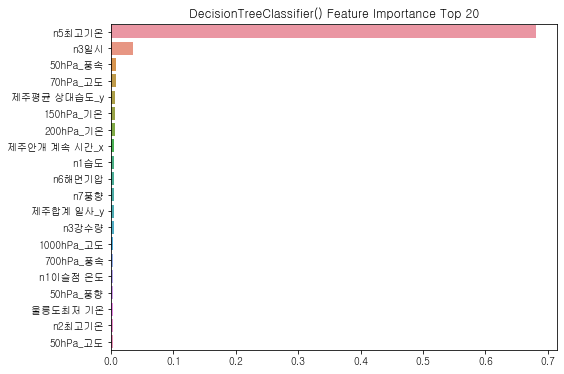

--------------------------------------------------


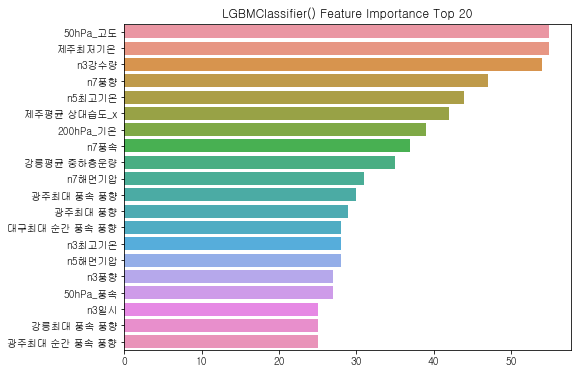

--------------------------------------------------


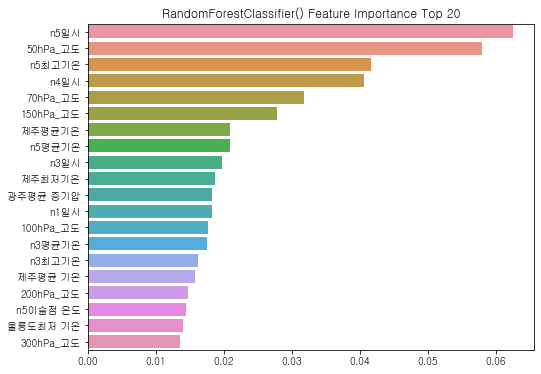

--------------------------------------------------


In [70]:
#### Feature importance 시각화 하기 

model = [dtc,lgbm,rfc]
for i in model:
    # 배열형태로 반환
    ft_importance_values = i.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
    plt.figure(figsize=(8,6))
    plt.title('{} Feature Importance Top 20'.format(i))
    sns.barplot(x=ft_top20, y=ft_top20.index)
    plt.show()
    print('-'*50)